# Fraudulent Transaction Detector

Fraud has become a scandal in financial reporting. Evidently, many large companies
were dragged into fraud cases such as SK Global, Vivendi, Enron, Parmalat, Adelphia, Cendant,
WorldCom, and Royal Ahold (Albrecht, et al., 2008). Companies are caught up in the situation of
business globalization which has triggered intense business competition. As a result, companies
are looking for any way to keep their business operating properly and even become winners in
global business competition. One of the ways is to commit financial reporting fraud.

There is a lack of public available datasets on financial services and specially in the emerging mobile money transactions domain. Financial datasets are important to many researchers and in particular to us performing research in the domain of fraud detection. Part of the problem is the intrinsically private nature of financial transactions, that leads to no publicly available datasets.

We present a synthetic dataset generated using the simulator called PaySim as an approach to such a problem. PaySim uses aggregated data from the private dataset to generate a synthetic dataset that resembles the normal operation of transactions and injects malicious behaviour to later evaluate the performance of fraud detection methods.

PaySim simulates mobile money transactions based on a sample of real transactions extracted from one month of financial logs from a mobile money service implemented in an African country. The original logs were provided by a multinational company, who is the provider of the mobile financial service which is currently running in more than 14 countries all around the world.

This synthetic dataset is scaled down 1/4 of the original dataset and it is created just for [Kaggle](https://www.kaggle.com/ntnu-testimon/paysim1).

Transaction Fraud occurs when a stolen payment card or data is used to generate an unauthorized transaction. The move to real-time transactions is causing significant security challenges for banks, merchants and issuers alike. Quicker transaction times increase the chances of fraudulent transactions going undetected. -*paygilant.com*

# Problems
A business can lose a significant amount of assets due to fraud. At an extreme level, the effects of fraud can even shut down a company. Based on this dataset, we could find:
1. Does type of transaction affect the fraud transaction? 
2. Are transactions flagged as fraud is the real fraud transaction? 
3. Can we predict the transaction which has a fraud pattern?

# Goals
1. Find out the correlation between fraud transaction and type of transaction, flagged as fraud, amount of transaction, transaction's timestamp, and anything.
2. Make a Machine Learning model to predict whether the transaction is fraud or not.

# 1) Preparation of Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install sidetable
import sidetable

import warnings
warnings.filterwarnings('ignore')

In [5]:
fraud = pd.read_csv("/content/drive/My Drive/Datasets/synthetic_financial_fraud.csv")
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


#2) Explaination of Each Column

In [7]:
col_detail = ["maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).",
              "CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.",
              "amount of the transaction in local currency.",
              "customer who started the transaction.",
              "initial balance before the transaction.",
              "new balance after the transaction.",
              "customer who is the recipient of the transaction.",
              "initial balance recipient before the transaction. Note that there is no information for customers that start with M (Merchants).",
              "new balance recipient after the transaction. Note that there is no information for customers that start with M (Merchants).",
              "This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.",
              "The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction."]

descr = []
j = 0
for name in fraud.columns:
  descr.append(
      [
       name,
       fraud[name].dtypes,
       fraud[name].isnull().sum(),
       round(fraud[name].isnull().sum()/len(fraud)*100, 2),
       fraud[name].nunique(),
       fraud[name].unique(),
       col_detail[j]
       ]
       )
  j += 1

column_desc = pd.DataFrame(descr, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique','Description'])
print(f"Total column of this data set is: {len(fraud.columns)} columns.")

Total column of this data set is: 11 columns.


In [8]:
column_desc

,Column,Dtype,Null,Null (%),nUnique,Unique,Description
0,step,int64,0,0.0,743,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",maps a unit of time in the real world. In this...
1,type,object,0,0.0,5,"[PAYMENT, TRANSFER, CASH_OUT, DEBIT, CASH_IN]","CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER."
2,amount,float64,0,0.0,5316900,"[9839.64, 1864.28, 181.0, 11668.14, 7817.71, 7...",amount of the transaction in local currency.
3,nameOrig,object,0,0.0,6353307,"[C1231006815, C1666544295, C1305486145, C84008...",customer who started the transaction.
4,oldbalanceOrg,float64,0,0.0,1845844,"[170136.0, 21249.0, 181.0, 41554.0, 53860.0, 1...",initial balance before the transaction.
5,newbalanceOrig,float64,0,0.0,2682586,"[160296.36, 19384.72, 0.0, 29885.86, 46042.29,...",new balance after the transaction.
6,nameDest,object,0,0.0,2722362,"[M1979787155, M2044282225, C553264065, C389970...",customer who is the recipient of the transaction.
7,oldbalanceDest,float64,0,0.0,3614697,"[0.0, 21182.0, 41898.0, 10845.0, 5083.0, 22425...",initial balance recipient before the transacti...
8,newbalanceDest,float64,0,0.0,3555499,"[0.0, 40348.79, 157982.12, 51513.44, 16896.7, ...",new balance recipient after the transaction. N...
9,isFraud,int64,0,0.0,2,"[0, 1]",This is the transactions made by the fraudulen...


# 3) Feature Extraction

In [ ]:
fraud['initiator'] = fraud['nameOrig'].apply(lambda x: x[0])
fraud['recipient'] = fraud['nameDest'].apply(lambda x: x[0])

# M = Merchant
# C = Customer

# 4) Outliers

In [ ]:
fraud.describe().T

# The average of each feature is:
    # amount = $ 179,861.9; between $ 0  - $ 92,445,520
    # oldbalanceOrg = $ 833,883.7; between $ 0 - $ 59,585,040
    # newbalanceOrig = $ 855,113.7; between $ 0 - $ 49,585,040
    # oldbalanceDest = $ 1,100,702; between $ 0 - $ 356,015,900
    # newbalanceDest = $ 1,224,996: between $ 0 - $ 356,179,300

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


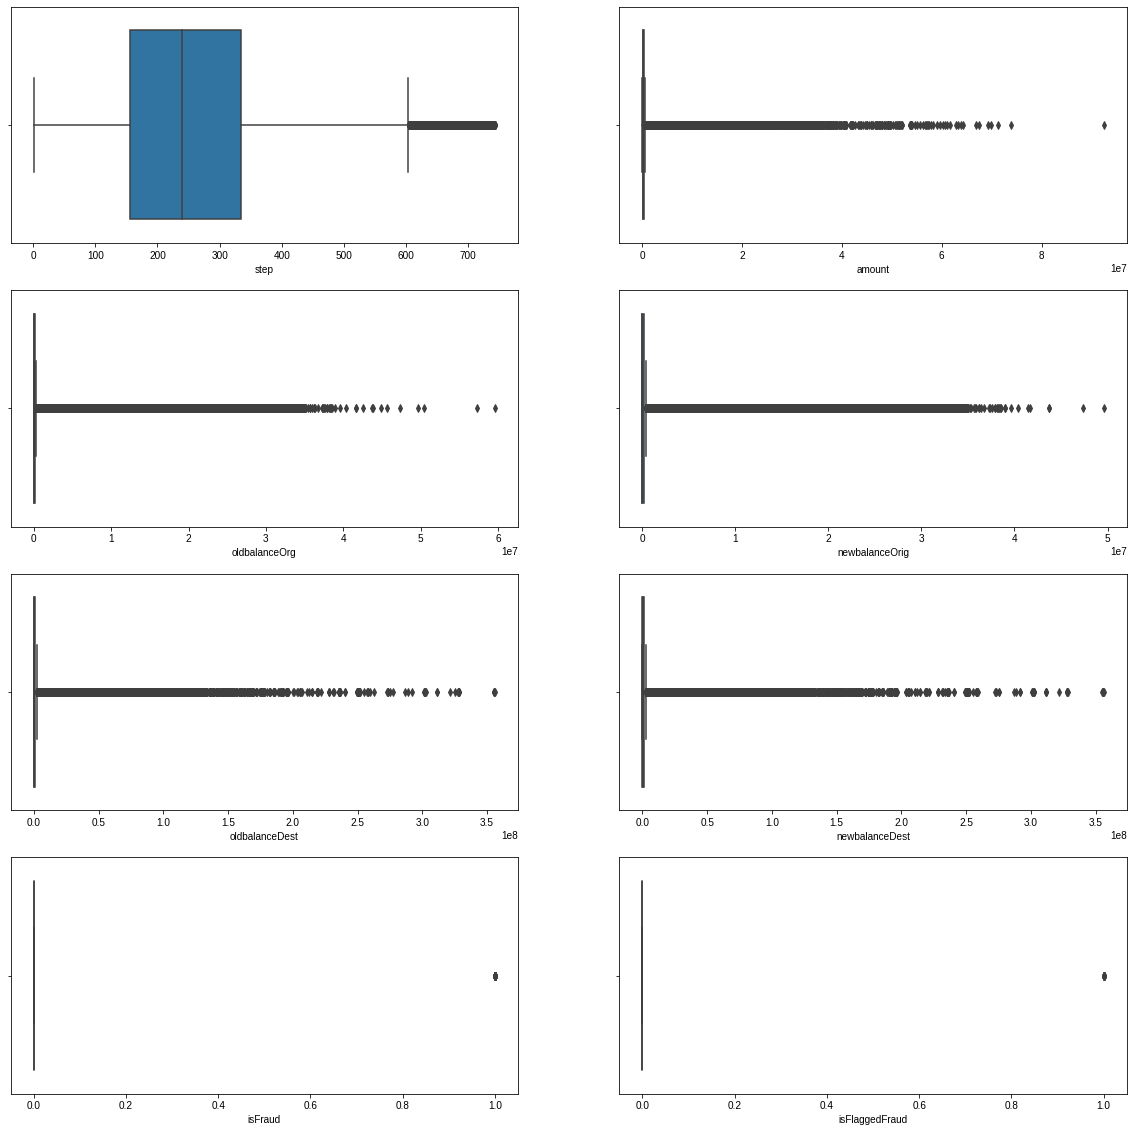

In [ ]:
plt.figure(figsize = (20,20))

n = 1
for name in fraud.describe().columns:
  plt.subplot(4,2,n)
  sns.boxplot(fraud[name])
  n += 1

plt.style.use('seaborn-whitegrid')
plt.show()

## step

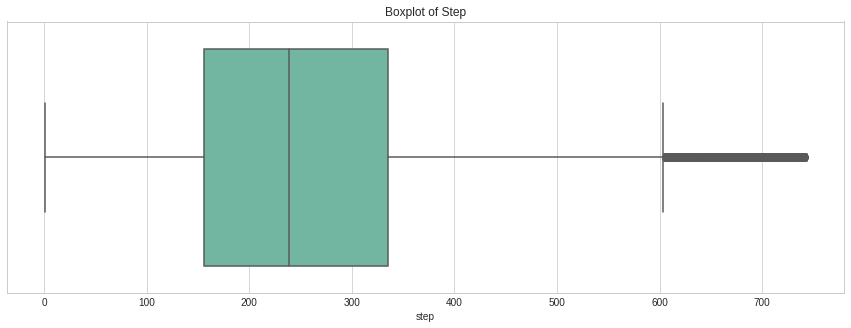

In [ ]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'step', data = fraud, palette = 'Set2')
plt.title('Boxplot of Step')
plt.show()

In [ ]:
Q1_st = fraud.describe()['step']['25%']
Q3_st = fraud.describe()['step']['75%']
IQR_st = Q3_st - Q1_st
UpFence_st = Q3_st + (1.5 * IQR_st)
LoFence_st = Q1_st - (1.5 * IQR_st)

out_st = (fraud['step'] < LoFence_st) | (fraud['step'] > UpFence_st)
fraud[out_st].sort_values(by = 'step')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6259932,604,TRANSFER,714218.48,C454938739,714218.48,0.0,C482986731,0.00,0.00,1,0
6259933,604,CASH_OUT,714218.48,C1835708623,714218.48,0.0,C1881116283,106940.83,821159.31,1,0
6259934,604,TRANSFER,277582.53,C2144116571,277582.53,0.0,C570246252,0.00,0.00,1,0
6259935,604,CASH_OUT,277582.53,C1512896686,277582.53,0.0,C731882373,0.00,277582.53,1,0
6259936,604,TRANSFER,4672401.04,C801580496,4672401.04,0.0,C1917884973,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0


In [ ]:
print(f"Outliers of 'step' column is above {UpFence_st} .")
print(f"Total data which counted as an outliers is {len(fraud[out_st].sort_values(by = 'step'))} of {len(fraud)} rows.")
print(f"It's{(len(fraud[out_st]) ) / len(fraud) * 100 : .2f}% from the entire rows.")

Outliers of 'step' column is above 603.5 .
Total data which counted as an outliers is 102688 of 6362620 rows.
It's 1.61% from the entire rows.


## amount

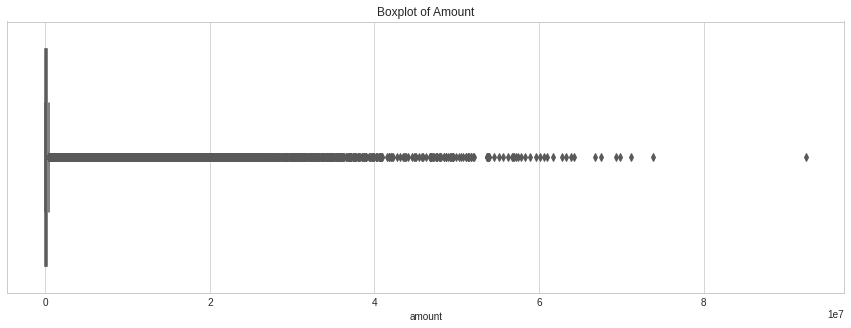

In [ ]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'amount', data = fraud, palette = 'Set2')
plt.title('Boxplot of Amount')
plt.show()

In [ ]:
Q1_am = fraud.describe()['amount']['25%']
Q3_am = fraud.describe()['amount']['75%']
IQR_am = Q3_am - Q1_am
UpFence_am = Q3_am + (1.5 * IQR_am)
LoFence_am = Q1_am - (1.5 * IQR_am)

out_am = (fraud['amount'] < LoFence_am) | (fraud['amount'] > UpFence_am)
fraud[out_am].sort_values(by = 'amount')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1675737,159,CASH_OUT,501719.38,C1970677139,18653.0,0.0,C1619270798,2.354190e+05,7.371384e+05,0,0
533878,21,TRANSFER,501720.45,C1064889935,0.0,0.0,C1185364331,3.477910e+06,3.979630e+06,0,0
3711749,277,TRANSFER,501720.90,C479715633,129646.0,0.0,C1917348003,6.006220e+05,1.102343e+06,0,0
5217892,370,TRANSFER,501721.39,C1224745576,0.0,0.0,C1255460362,5.868069e+06,6.369791e+06,0,0
2880161,228,CASH_OUT,501721.54,C1687416580,52968.0,0.0,C1983941363,5.839300e+02,5.023055e+05,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3911956,284,TRANSFER,69337316.27,C1584456031,0.0,0.0,C1472140329,1.130072e+08,1.823446e+08,0,0
3946920,286,TRANSFER,69886731.30,C1425667947,0.0,0.0,C167875008,1.515387e+08,2.214254e+08,0,0
4146397,303,TRANSFER,71172480.42,C2044643633,0.0,0.0,C84111522,1.134615e+08,1.846340e+08,0,0
4060598,300,TRANSFER,73823490.36,C2127282686,0.0,0.0,C753026640,9.362401e+07,1.674475e+08,0,0


In [ ]:
print(f"Outliers of 'amount' column is above {UpFence_am} .")
print(f"Total data which counted as an outliers is {len(fraud[out_am].sort_values(by = 'amount'))} of {len(fraud)} rows.")
print(f"It's{(len(fraud[out_am]) ) / len(fraud) * 100 : .2f}% from the entire rows.")

Outliers of 'amount' column is above 501719.3387500001 .
Total data which counted as an outliers is 338078 of 6362620 rows.
It's 5.31% from the entire rows.


## oldbalanceOrg

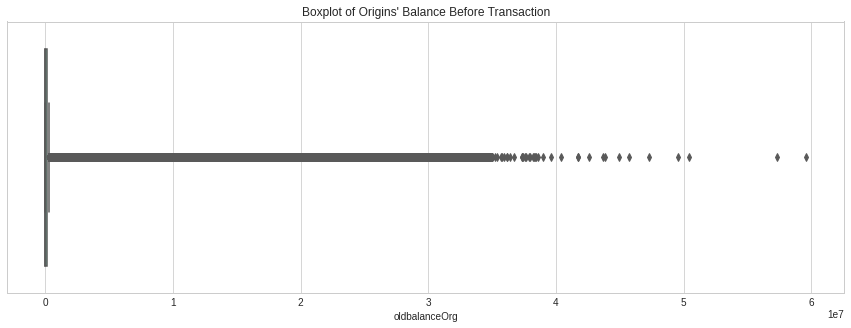

In [ ]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'oldbalanceOrg', data = fraud, palette = 'Set2')
plt.title("Boxplot of Origins' Balance Before Transaction")
plt.show()

In [ ]:
Q1_oo = fraud.describe()['oldbalanceOrg']['25%']
Q3_oo = fraud.describe()['oldbalanceOrg']['75%']
IQR_oo = Q3_oo - Q1_oo
UpFence_oo = Q3_oo + (1.5 * IQR_oo)
LoFence_oo = Q1_oo - (1.5 * IQR_oo)

out_oo = (fraud['oldbalanceOrg'] < LoFence_oo) | (fraud['oldbalanceOrg'] > UpFence_oo)
fraud[out_oo].sort_values(by = 'oldbalanceOrg')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2855477,227,CASH_IN,173120.55,C1339705423,268289.00,441409.55,C1409849251,451135.81,278015.25,0,0
5453297,379,CASH_IN,223010.63,C564914592,268289.33,491299.96,C570615256,545058.90,322048.27,0,0
3695631,277,TRANSFER,789075.81,C335848440,268290.00,0.00,C377498518,9046.37,798122.18,0,0
2294749,187,CASH_IN,179082.30,C671473753,268291.14,447373.44,C1682678296,1719702.53,1540620.23,0,0
2331191,188,PAYMENT,1725.30,C1704774205,268292.00,266566.70,M1499211901,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362454,730,TRANSFER,10000000.00,C507645439,47316255.05,37316255.05,C270374999,0.00,0.00,1,0
5996401,425,TRANSFER,10000000.00,C1551381510,49585040.37,39585040.37,C1042012237,0.00,0.00,1,0
6281474,646,TRANSFER,10000000.00,C590657619,50399045.08,40399045.08,C1971187430,0.00,0.00,1,0
6362452,730,TRANSFER,10000000.00,C726730575,57316255.05,47316255.05,C1364745638,0.00,0.00,1,0


In [ ]:
print(f"Outliers of 'oldbalanceOrg' column is above {UpFence_oo} .")
print(f"Total data which counted as an outliers is {len(fraud[out_oo].sort_values(by = 'oldbalanceOrg'))} of {len(fraud)} rows.")
print(f"It's{(len(fraud[out_oo]) ) / len(fraud) * 100 : .2f}% from the entire rows.")

Outliers of 'oldbalanceOrg' column is above 268287.9375 .
Total data which counted as an outliers is 1112507 of 6362620 rows.
It's 17.49% from the entire rows.


## newbalanceOrig

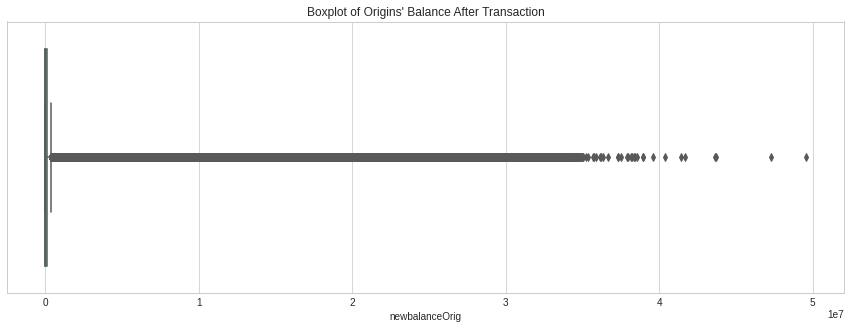

In [ ]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'newbalanceOrig', data = fraud, palette = 'Set2')
plt.title("Boxplot of Origins' Balance After Transaction")
plt.show()

In [ ]:
Q1_no = fraud.describe()['newbalanceOrig']['25%']
Q3_no = fraud.describe()['newbalanceOrig']['75%']
IQR_no = Q3_no - Q1_no
UpFence_no = Q3_no + (1.5 * IQR_no)
LoFence_no = Q1_no - (1.5 * IQR_no)

out_no = (fraud['newbalanceOrig'] < LoFence_no) | (fraud['newbalanceOrig'] > UpFence_no)
fraud[out_no].sort_values(by = 'newbalanceOrig')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4142542,303,PAYMENT,11736.65,C1882364076,372382.85,360646.21,M1996228750,0.00,0.00,0,0
6277218,640,CASH_IN,51918.67,C813934781,308728.00,360646.67,C372210652,2099432.78,2047514.11,0,0
5988582,416,PAYMENT,12064.19,C1915432743,372710.93,360646.74,M1415072321,0.00,0.00,0,0
1722100,160,CASH_IN,30645.77,C670096006,330001.00,360646.77,C1245460529,2468968.04,2438322.27,0,0
1175956,132,CASH_IN,355652.07,C487853193,4995.00,360647.07,C1918566013,151625.25,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4180200,304,PAYMENT,8301.85,C1568160039,41699144.49,41690842.64,M1906748245,0.00,0.00,0,0
4203640,305,PAYMENT,12814.12,C2080486364,43686616.33,43673802.21,M928977012,0.00,0.00,0,0
4203639,305,CASH_OUT,132238.97,C559275248,43818855.30,43686616.33,C1114436169,5327024.57,5459263.54,0,0
6362452,730,TRANSFER,10000000.00,C726730575,57316255.05,47316255.05,C1364745638,0.00,0.00,1,0


In [ ]:
print(f"Outliers of 'newbalanceOrig' column is above {UpFence_no} .")
print(f"Total data which counted as an outliers is {len(fraud[out_no].sort_values(by = 'newbalanceOrig'))} of {len(fraud)} rows.")
print(f"It's{(len(fraud[out_no]) ) / len(fraud) * 100 : .2f}% from the entire rows.")

Outliers of 'newbalanceOrig' column is above 360646.025 .
Total data which counted as an outliers is 1053391 of 6362620 rows.
It's 16.56% from the entire rows.


## oldbalanceDest

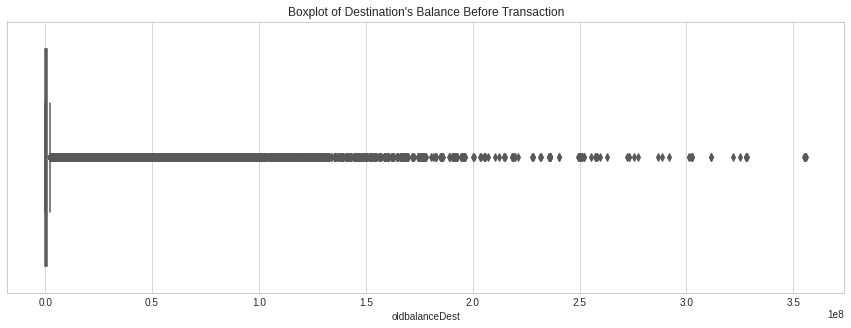

In [ ]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'oldbalanceDest', data = fraud, palette = 'Set2')
plt.title("Boxplot of Destination's Balance Before Transaction")
plt.show()

In [ ]:
Q1_od = fraud.describe()['oldbalanceDest']['25%']
Q3_od = fraud.describe()['oldbalanceDest']['75%']
IQR_od = Q3_od - Q1_od
UpFence_od = Q3_od + (1.5 * IQR_od)
LoFence_od = Q1_od - (1.5 * IQR_od)

out_od = (fraud['oldbalanceDest'] < LoFence_od) | (fraud['oldbalanceDest'] > UpFence_od)
fraud[out_od].sort_values(by = 'oldbalanceDest')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2003497,179,CASH_OUT,106524.81,C243684170,26178.94,0.00,C498208077,2.357595e+06,2.464120e+06,0,0
1888337,164,CASH_OUT,550.75,C1585315021,0.00,0.00,C723875839,2.357596e+06,2.645071e+06,0,0
6351142,699,CASH_OUT,181545.14,C1305964333,181545.14,0.00,C1072558316,2.357597e+06,2.539142e+06,1,0
2572641,207,TRANSFER,861327.90,C1192793948,0.00,0.00,C691387667,2.357600e+06,3.218928e+06,0,0
3138836,236,CASH_OUT,45149.95,C1669562244,2056.00,0.00,C548262953,2.357613e+06,2.402763e+06,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5380607,376,CASH_OUT,194946.47,C4896808,0.00,0.00,C439737079,3.551855e+08,3.553805e+08,0,0
5486389,380,TRANSFER,635405.82,C1666289749,0.00,0.00,C439737079,3.553805e+08,3.560159e+08,0,0
4721497,332,CASH_IN,195896.55,C494525103,4178494.78,4374391.33,C439737079,3.553814e+08,3.551855e+08,0,0
4596803,328,CASH_IN,171982.69,C758787020,31748.00,203730.69,C439737079,3.555534e+08,3.553814e+08,0,0


In [ ]:
print(f"Outliers of 'oldbalanceDest' column is above {UpFence_od} .")
print(f"Total data which counted as an outliers is {len(fraud[out_od].sort_values(by = 'oldbalanceDest'))} of {len(fraud)} rows.")
print(f"It's{(len(fraud[out_od]) ) / len(fraud) * 100 : .2f}% from the entire rows.")

Outliers of 'oldbalanceDest' column is above 2357591.76875 .
Total data which counted as an outliers is 786135 of 6362620 rows.
It's 12.36% from the entire rows.


## newbalanceDest

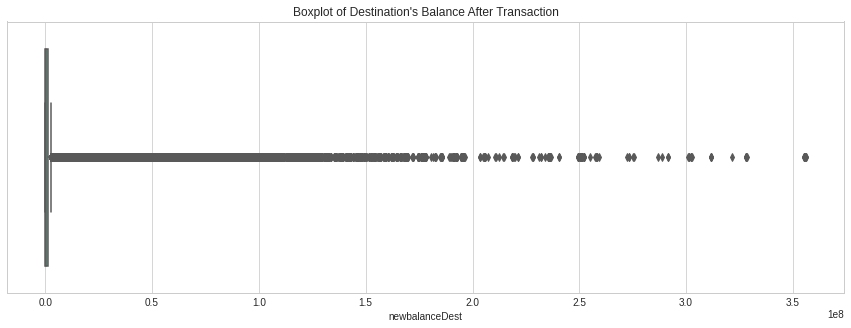

In [ ]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'newbalanceDest', data = fraud, palette = 'Set2')
plt.title("Boxplot of Destination's Balance After Transaction")
plt.show()

In [ ]:
Q1_nd = fraud.describe()['newbalanceDest']['25%']
Q3_nd = fraud.describe()['newbalanceDest']['75%']
IQR_nd = Q3_nd - Q1_nd
UpFence_nd = Q3_nd + (1.5 * IQR_nd)
LoFence_nd = Q1_nd - (1.5 * IQR_nd)

out_nd = (fraud['newbalanceDest'] < LoFence_nd) | (fraud['newbalanceDest'] > UpFence_nd)
fraud[out_nd].sort_values(by = 'newbalanceDest')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3264943,251,CASH_OUT,543488.73,C1043182061,0.0,0.00,C1688754215,2.236287e+06,2.779776e+06,0,0
4585117,328,CASH_IN,95663.93,C1495975065,14116.0,109779.93,C2109305576,2.875442e+06,2.779778e+06,0,0
4474058,324,CASH_OUT,91346.48,C14602225,29315.0,0.00,C1815358616,2.688433e+06,2.779779e+06,0,0
4250310,306,TRANSFER,1340067.35,C1306069173,0.0,0.00,C131129476,1.439718e+06,2.779785e+06,0,0
3443232,257,TRANSFER,222800.50,C2131279020,0.0,0.00,C1876350821,2.556992e+06,2.779792e+06,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4596803,328,CASH_IN,171982.69,C758787020,31748.0,203730.69,C439737079,3.555534e+08,3.553814e+08,0,0
4124250,302,TRANSFER,3325263.90,C1812458696,0.0,0.00,C439737079,3.215898e+08,3.555534e+08,0,0
4133583,302,TRANSFER,30638354.89,C1800693711,0.0,0.00,C439737079,3.249151e+08,3.555534e+08,0,0
5486389,380,TRANSFER,635405.82,C1666289749,0.0,0.00,C439737079,3.553805e+08,3.560159e+08,0,0


In [ ]:
print(f"Outliers of 'newbalanceDest' column is above {UpFence_nd} .")
print(f"Total data which counted as an outliers is {len(fraud[out_nd].sort_values(by = 'newbalanceDest'))} of {len(fraud)} rows.")
print(f"It's{(len(fraud[out_nd]) ) / len(fraud) * 100 : .2f}% from the entire rows.")

Outliers of 'newbalanceDest' column is above 2779773.125 .
Total data which counted as an outliers is 738527 of 6362620 rows.
It's 11.61% from the entire rows.


## isFraud

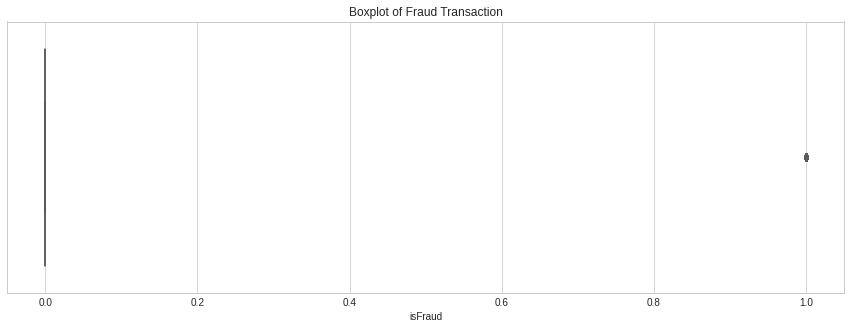

In [ ]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'isFraud', data = fraud, palette = 'Set2')
plt.title("Boxplot of Fraud Transaction")
plt.show()

In [ ]:
Q1_f = fraud.describe()['isFraud']['25%']
Q3_f = fraud.describe()['isFraud']['75%']
IQR_f = Q3_f - Q1_f
UpFence_f = Q3_f + (1.5 * IQR_f)
LoFence_f = Q1_f - (1.5 * IQR_f)

out_f = (fraud['isFraud'] < LoFence_f) | (fraud['isFraud'] > UpFence_f)
fraud[out_f].sort_values(by = 'isFraud')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
6050772,493,TRANSFER,605108.36,C1640703547,605108.36,0.0,C2025320594,0.00,0.00,1,0
6050496,493,CASH_OUT,567729.52,C1127265876,567729.52,0.0,C661987351,365798.00,933527.51,1,0
6050495,493,TRANSFER,567729.52,C317779855,567729.52,0.0,C1088161711,0.00,0.00,1,0
6049785,493,CASH_OUT,144452.14,C1064034527,144452.14,0.0,C1937398960,223043.46,367495.60,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3192127,241,TRANSFER,989966.55,C351713185,989966.55,0.0,C775439776,0.00,0.00,1,0
3192027,241,CASH_OUT,657417.64,C1843566745,657417.64,0.0,C742045843,0.00,657417.64,1,0
3192026,241,TRANSFER,657417.64,C1148562150,657417.64,0.0,C1745091361,0.00,0.00,1,0
3220577,250,TRANSFER,213463.32,C848070944,213463.32,0.0,C29887493,0.00,0.00,1,0


In [ ]:
print(f"Outliers of 'isFraud' column is above {UpFence_f} .")
print(f"Total data which counted as an outliers is {len(fraud[out_f].sort_values(by = 'isFraud'))} of {len(fraud)} rows.")
print(f"It's{(len(fraud[out_f]) ) / len(fraud) * 100 : .2f}% from the entire rows.")

Outliers of 'isFraud' column is above 0.0 .
Total data which counted as an outliers is 8213 of 6362620 rows.
It's 0.13% from the entire rows.


## isFlaggedFraud

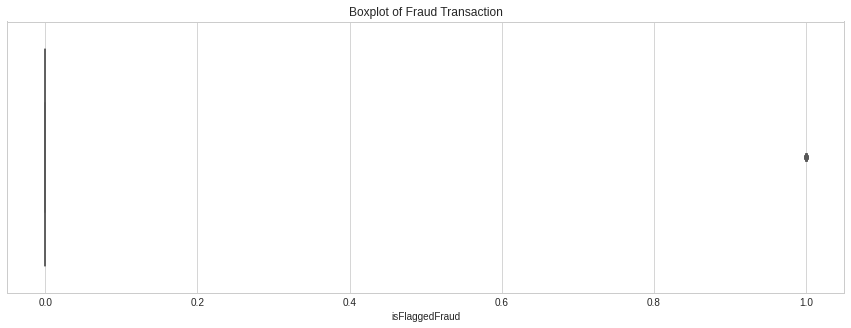

In [ ]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'isFlaggedFraud', data = fraud, palette = 'Set2')
plt.title("Boxplot of Fraud Transaction")
plt.show()

In [ ]:
Q1_ff = fraud.describe()['isFlaggedFraud']['25%']
Q3_ff = fraud.describe()['isFlaggedFraud']['75%']
IQR_ff = Q3_ff - Q1_ff
UpFence_ff = Q3_ff + (1.5 * IQR_ff)
LoFence_ff = Q1_ff - (1.5 * IQR_ff)

out_ff = (fraud['isFlaggedFraud'] < LoFence_ff) | (fraud['isFlaggedFraud'] > UpFence_ff)
fraud[out_ff].sort_values(by = 'isFlaggedFraud')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [ ]:
print(f"Outliers of 'isFlaggedFraud' column is above {UpFence_ff} .")
print(f"Total data which counted as an outliers is {len(fraud[out_ff].sort_values(by = 'isFlaggedFraud'))} of {len(fraud)} rows.")
print(f"It's{(len(fraud[out_ff]) ) / len(fraud) * 100 : .2f}% from the entire rows.")

Outliers of 'isFlaggedFraud' column is above 0.0 .
Total data which counted as an outliers is 16 of 6362620 rows.
It's 0.00% from the entire rows.


# 5) Exploratory Data Analysis

In [ ]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,recipient,initiator
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,M,C
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,M,C
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,C,C
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,C,C
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,M,C


## Fraudulent Transaction

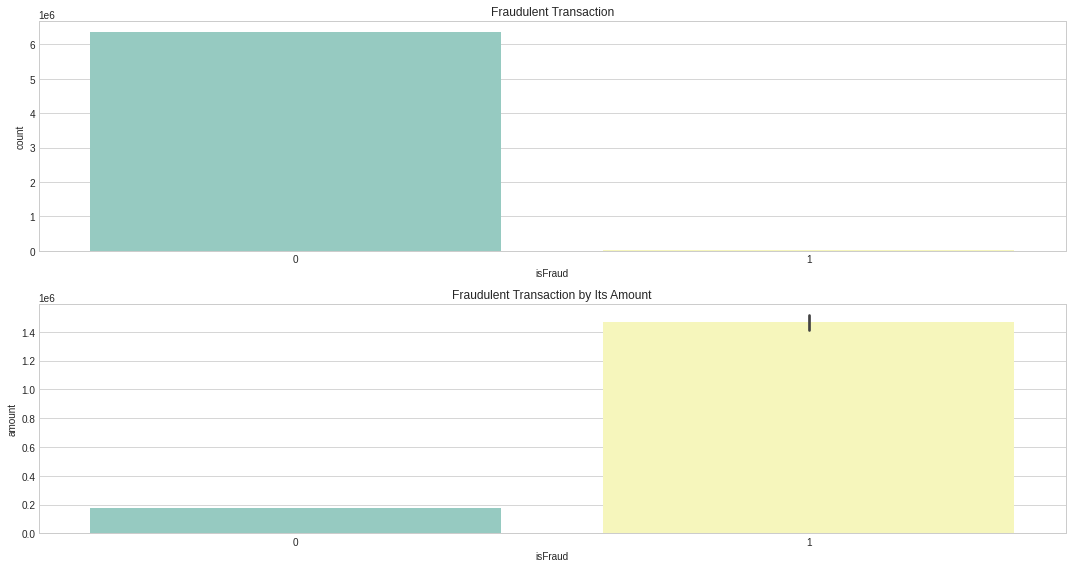

In [ ]:
plt.figure(figsize = (15,8))

plt.subplot(2,1,1)
sns.countplot(fraud['isFraud'], palette = 'Set3')
plt.title("Fraudulent Transaction")
# The Fraudulent Target is obviously not balance 99:1
# but at least we know that most transaction is safe.

plt.subplot(2,1,2)
sns.barplot(x = fraud['isFraud'], y = fraud['amount'], palette = 'Set3')
plt.title("Fraudulent Transaction by Its Amount")
# maybe it's only 0.1% transaction which fraud
# but when it comes to 'amount', there are $1,467,967 are fraud (89.2%)
# and $178,197.0 are not fraud (10.8%)

plt.tight_layout()
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
fraud.stb.freq(['isFraud'], cum_cols = False)

,isFraud,count,percent
0,0,6354407,99.870918
1,1,8213,0.129082


In [ ]:
fraud.groupby('isFraud').mean()['amount'].to_frame()

,amount
isFraud,
0,1.781970e+05
1,1.467967e+06


In [ ]:
## showing its percentage
(pd.crosstab(index = fraud['isFraud'],
            columns = 'Amount Percentage',
            values = fraud['amount'],
            aggfunc = 'mean',
            normalize = True)*100).round(3)

col_0,Amount Percentage
isFraud,
0,10.825
1,89.175


## Flagged as Fraudulent

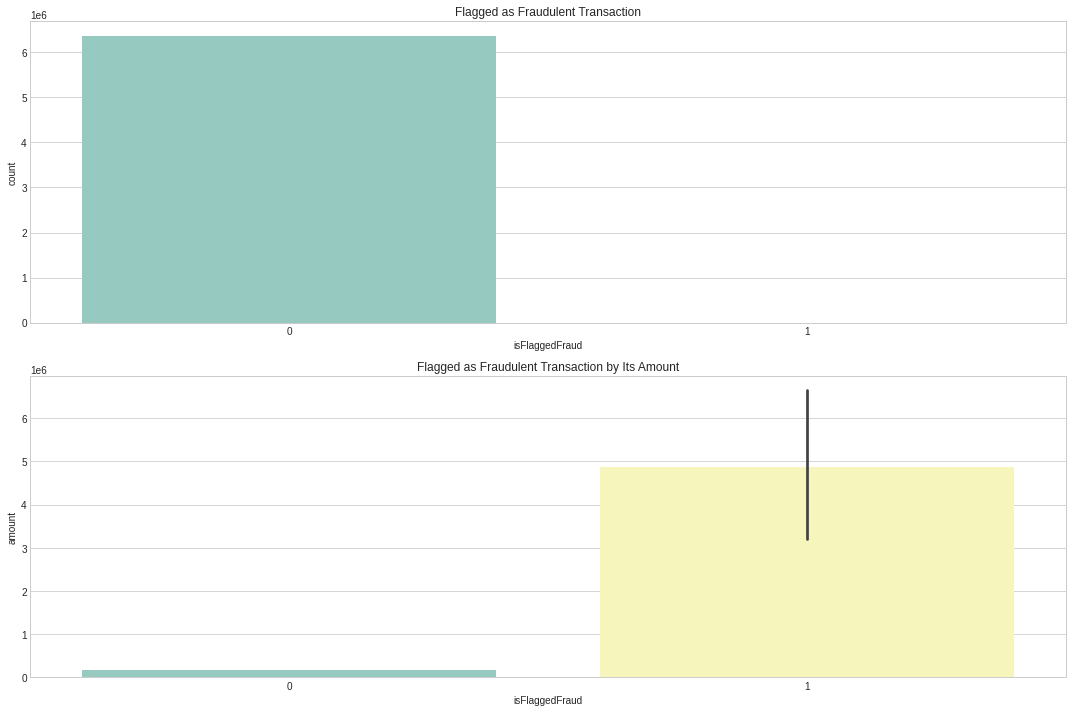

In [ ]:
plt.figure(figsize = (15,10))

plt.subplot(2,1,1)
sns.countplot(fraud['isFlaggedFraud'], palette = 'Set3')
plt.title("Flagged as Fraudulent Transaction")
# Based on this feature, 16 transactions flagged as fraudulent 
# but actually there are 8213 transactions are fraud.
# we definitely can't use this feature because there are 8197 fraud transaction which are not flagged as fraudulent transaction

plt.subplot(2,1,2)
sns.barplot(x = fraud['isFlaggedFraud'], y = fraud['amount'], palette = 'Set3')
plt.title("Flagged as Fraudulent Transaction by Its Amount")
# we see all transactions which has been flagged ($4,861,598) is a lot bigger than the actual ($1,467,967), 
# eventhough the transaction is way smaller (16 transactions) than the actual fraud (8213 transactions).
# This feature is so irrelevant for us to see which transaction is fraud.

plt.tight_layout()
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
fraud.stb.freq(['isFlaggedFraud'], cum_cols = False)

,isFlaggedFraud,count,percent
0,0,6362604,99.999749
1,1,16,0.000251


In [ ]:
pd.crosstab(index = fraud['isFlaggedFraud'],
            columns = 'Average of Amount',
            values = fraud['amount'],
            aggfunc = 'mean')

col_0,Average of Amount
isFlaggedFraud,
0,1.798501e+05
1,4.861598e+06


## Customer and Merchant

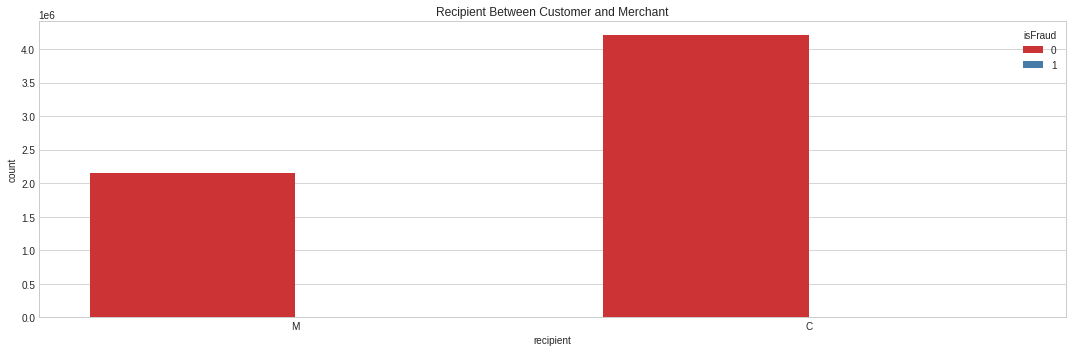

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(fraud['recipient'], hue = fraud['isFraud'], palette = 'Set1')
plt.title("Recipient Between Customer and Merchant")

plt.tight_layout()
plt.style.use('seaborn-whitegrid')
plt.show()

# we now know that 100% fraud transaction came from customer recipient.
# while the transaction which not fraud is from 66.1% Customer and 33.9% Merchant

In [ ]:
(pd.crosstab(fraud['isFraud'], fraud['recipient'], normalize = 'index')*100).round(3)

recipient,C,M
isFraud,,
0,66.142,33.858
1,100.000,0.000


## Transaction Type

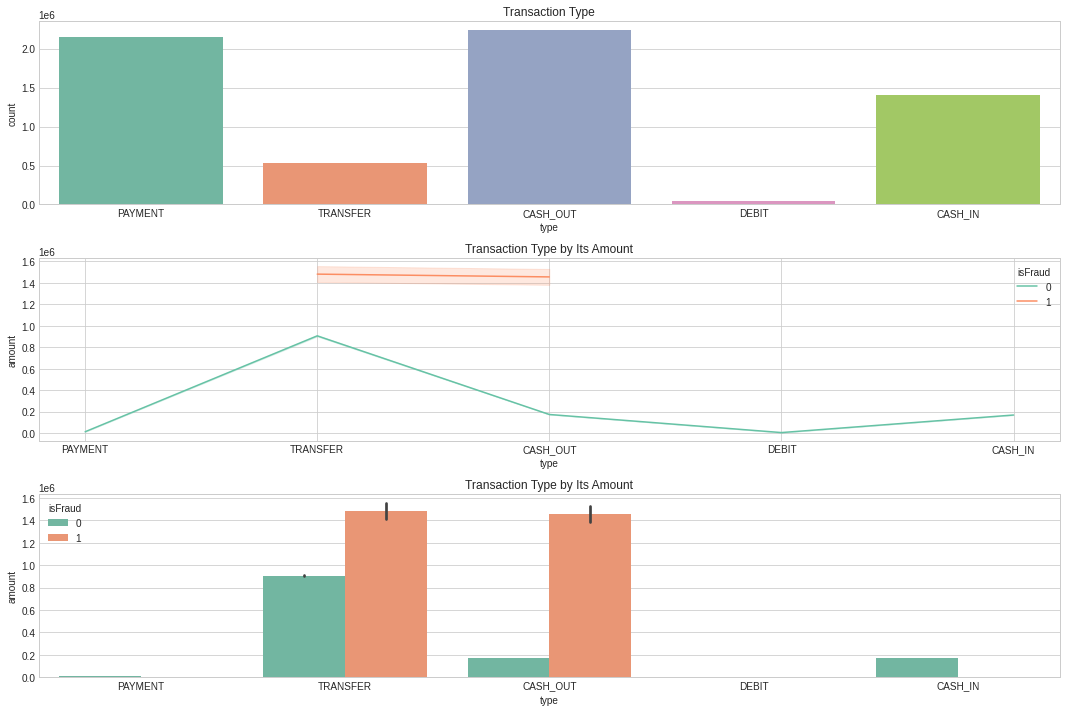

In [ ]:
plt.figure(figsize = (15,10))

plt.subplot(3,1,1)
sns.countplot(fraud['type'], palette = 'Set2')
plt.title("Transaction Type")
# 35.2% of transactions is used for cash out
# 33.8% of transactions is used for payment
# 22.0% of transactions is used for cash in
#  8.4% of transaction is used for transfer
#  6.5% of transaction is used for debit
# we see that most of the number of general transaction is used for cash out and payment

plt.subplot(3,1,2)
sns.lineplot(x = fraud['type'], y = fraud['amount'], hue = fraud['isFraud'], palette = 'Set2')
plt.title("Transaction Type by Its Amount")
# All fraud transactions is coming from 'transfer' and 'cash out' transaction type.

plt.subplot(3,1,3)
sns.barplot(x = fraud['type'], y = fraud['amount'], hue = fraud['isFraud'], palette = 'Set2')
plt.title("Transaction Type by Its Amount")
# CASH_OUT    4116 transactions
# TRANSFER    4097 transactions
# hey it seems a way balance transaction between 'cash out' and 'transfer'.

plt.tight_layout()
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
fraud.stb.freq(['type'], cum_cols = False)

,type,count,percent
0,CASH_OUT,2237500,35.166331
1,PAYMENT,2151495,33.814608
2,CASH_IN,1399284,21.992261
3,TRANSFER,532909,8.375622
4,DEBIT,41432,0.651178


In [ ]:
pd.crosstab(index = fraud['type'],
            columns = fraud['isFraud'],
            values = fraud['amount'],
            aggfunc = 'mean')

isFraud,0,1
type,,
CASH_IN,168920.242004,NaN
CASH_OUT,173917.155751,1.455103e+06
DEBIT,5483.665314,NaN
PAYMENT,13057.604660,NaN
TRANSFER,906229.007812,1.480892e+06


In [ ]:
fraud[fraud['isFraud'] == 1]['type'].value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

## Making Sure Fraudulent Transaction by Origin-Destination Name

In [ ]:
fraud.describe(include = 'O')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1976208114,C1286084959
freq,2237500,3,113


In [ ]:
fraud[fraud['nameOrig'] == 'C1976208114']
# so, fraudulent transaction was not using the same origin name e.g. 'C1976208114'.
# how about destination name?

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
537473,21,CASH_OUT,342781.58,C1976208114,0.0,0.0,C51667834,865735.81,1486826.09,0,0
2869623,227,PAYMENT,6228.53,C1976208114,0.0,0.0,M1071788632,0.00,0.00,0,0
4652048,330,TRANSFER,162120.24,C1976208114,0.0,0.0,C1567139647,3817645.89,3979766.13,0,0


In [ ]:
fraud[fraud['nameDest'] == 'C1286084959']['isFraud'].value_counts().to_frame()
# no, it is not. Fraudulent transaction was not using the same destination name too e.g. 'C1286084959'.
# we can say that, fraudulent transaction is using different origin name and different destination name.

,isFraud
0,113


In [ ]:
# splitting the dataset first to be focus on the fraud transaction

fraud_yes = fraud[fraud['isFraud'] == 1]
fraud_no = fraud[fraud['isFraud'] == 0]

In [ ]:
fraud_yes.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [ ]:
fraud_yes.stb.freq(['nameOrig'], cum_cols = False)

# we see that every origin has maximum transaction, which is 1 time.

,nameOrig,count,percent
0,C99979309,1,0.012176
1,C999561448,1,0.012176
2,C998822926,1,0.012176
3,C998785780,1,0.012176
4,C998715487,1,0.012176
...,...,...,...
8208,C1000513158,1,0.012176
8209,C1000484178,1,0.012176
8210,C1000331499,1,0.012176
8211,C1000086512,1,0.012176


In [ ]:
fraud_yes.stb.freq(['nameDest'], cum_cols = False)

# we see that maximum number of transaction to destination is 2 times.
# the pattern of fraudulent transactions are:
    # 1 origin name for 1 destination name
    # 1 origin name for 2 destination name

,nameDest,count,percent
0,C967226405,2,0.024352
1,C964377943,2,0.024352
2,C935310781,2,0.024352
3,C904300960,2,0.024352
4,C803116137,2,0.024352
...,...,...,...
8164,C1000855680,1,0.012176
8165,C1000836187,1,0.012176
8166,C1000407130,1,0.012176
8167,C1000367306,1,0.012176


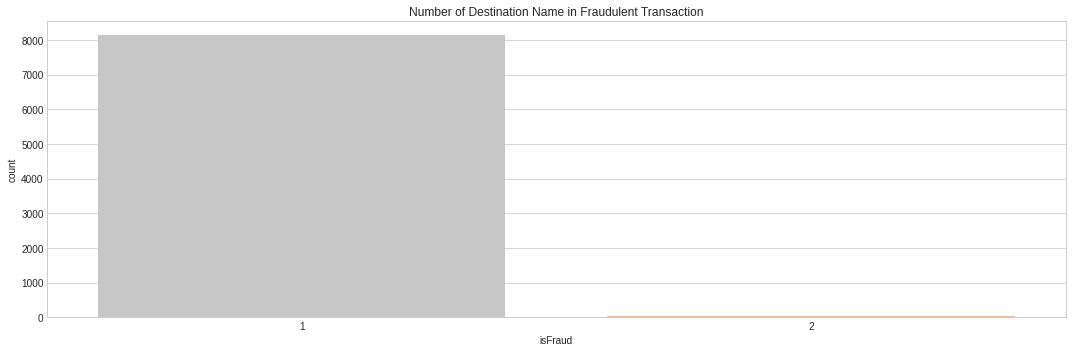

In [ ]:
fraud_yes_namedest = fraud_yes.groupby('nameDest').sum()

plt.figure(figsize = (15,5))

sns.countplot(fraud_yes_namedest['isFraud'], palette = 'RdGy_r')
plt.title("Number of Destination Name in Fraudulent Transaction")

plt.tight_layout()
plt.style.use('seaborn-whitegrid')
plt.show()


# but fraudulent transaction tends to using 1 origin name with 1 different destination name
# data below tells us that 99.5% fraudulent transaction came from 1 different destination name
# and the other which using 2 destination name with using 1 origin name is only 0.5%

In [ ]:
fraud_yes_namedest.stb.freq(['isFraud'], cum_cols = False)

,isFraud,count,percent
0,1,8125,99.461378
1,2,44,0.538622


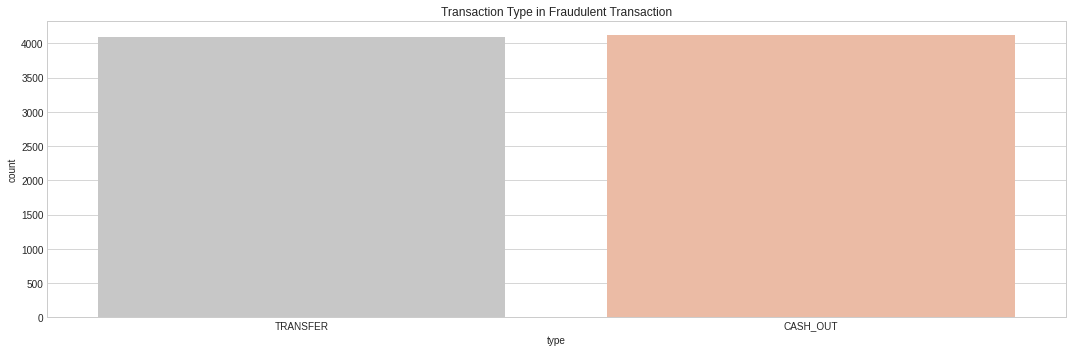

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(fraud_yes['type'], palette = 'RdGy_r')
plt.title("Transaction Type in Fraudulent Transaction")

plt.tight_layout()
plt.style.use('seaborn-whitegrid')
plt.show()

# TRANSFER	4097
# CASH_OUT	4116
# we see that this is a balance different transaction type yet same fraud.

In [ ]:
fraud_yes_type = fraud_yes.groupby('type').sum()
fraud_yes_type['isFraud'].to_frame()

,isFraud
type,
CASH_OUT,4116
TRANSFER,4097


## Relationship Between Origin and Destination

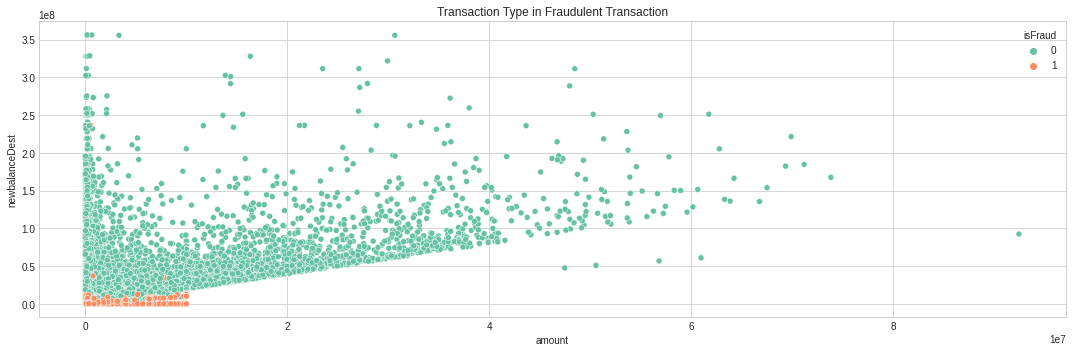

In [ ]:
plt.figure(figsize = (15,5))
sns.scatterplot(fraud['amount'], fraud['newbalanceDest'], hue = fraud['isFraud'], palette = 'Set2')
plt.title("Relationship Between Transaction Amount and Destination's Newest Balance")

plt.tight_layout()
plt.style.use('seaborn-whitegrid')
plt.show()

# Higher the amount of transaction, tend to higher new balance of destination

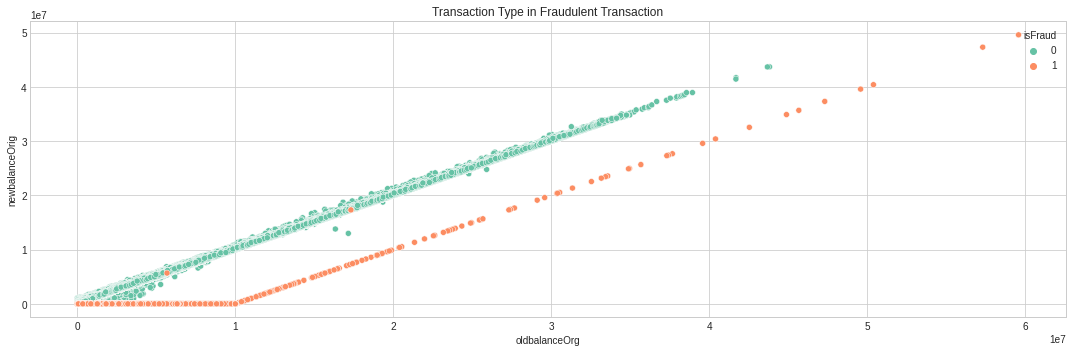

In [ ]:
plt.figure(figsize = (15,5))
sns.scatterplot(fraud['oldbalanceOrg'], fraud['newbalanceOrig'], hue = fraud['isFraud'], palette = 'Set2')
plt.title("Before vs. After Transaction in Origin's Balance")

plt.tight_layout()
plt.style.use('seaborn-whitegrid')
plt.show()

# we see that fraudulent transaction tends to emptying the origin's balance, especially balance which below $10,000,000.
# the fraudulent behavior of the agents aims to profit by taking control customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
# the difference pattern of fraud and not fraud transaction is very contrast.

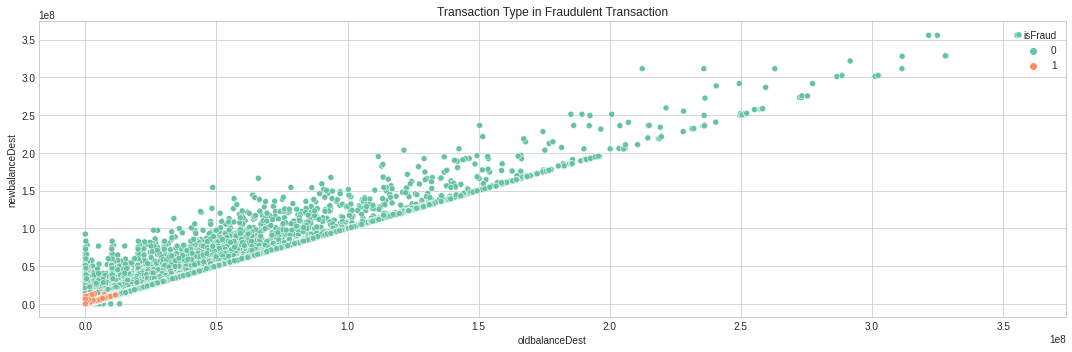

In [ ]:
plt.figure(figsize = (15,5))
sns.scatterplot(fraud['oldbalanceDest'], fraud['newbalanceDest'], hue = fraud['isFraud'], palette = 'Set2')
plt.title("Before vs. After Transaction in Destination's Balance")

plt.tight_layout()
plt.style.use('seaborn-whitegrid')
plt.show()

# higher the old balance of destination, higher the new balance of destination because of transaction from origin.

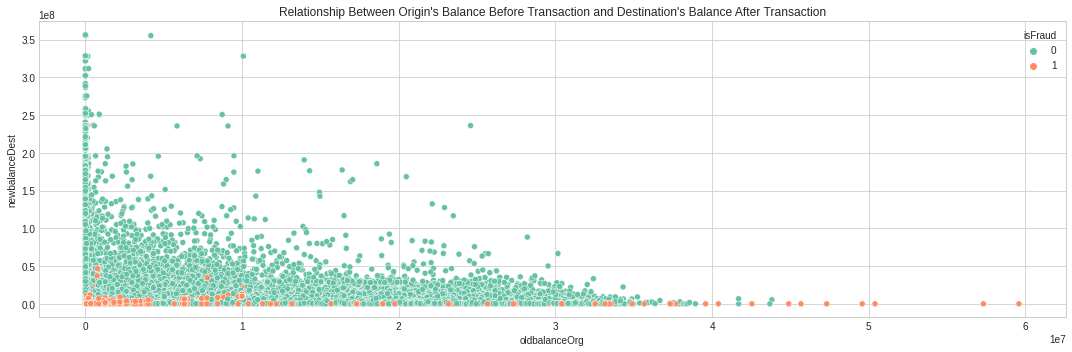

In [ ]:
plt.figure(figsize = (15,5))
sns.scatterplot(fraud['oldbalanceOrg'], fraud['newbalanceDest'], hue = fraud['isFraud'], palette = 'Set2')
plt.title("Relationship Between Origin's Balance Before Transaction and Destination's Balance After Transaction")

plt.tight_layout()
plt.style.use('seaborn-whitegrid')
plt.show()

# it's weird whatever the nominal of the origin's balance, most of the destination's balance is 0
# we should check further this transaction below

In [ ]:
fraud_yes[fraud_yes['type'] == 'CASH_OUT']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,recipient,initiator
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,C,C
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0,C,C
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0,C,C
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0,C,C
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0,C,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0,C,C
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0,C,C
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,C,C
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,C,C


In [ ]:
fraud_yes[fraud_yes['type'] == 'CASH_OUT'][['type', 
                                            'oldbalanceOrg',
                                            'newbalanceOrig',
                                            'oldbalanceDest',
                                            'newbalanceDest']].value_counts().to_frame()

# All fraudulent 'Cash Out' transactions looks make sense from origin's balance to destination's balance
# since from destination's balance and origin's balance is the same.
# however, these 'cash out' data is still called as fraud.

0
type     oldbalanceOrg newbalanceOrig oldbalanceDest newbalanceDest    
CASH_OUT 10000000.00   0.0            0.00           10000000.00     53
         0.00          0.0            0.00           0.00             6
         429257.45     0.0            0.00           429257.45        2
         1165187.89    0.0            0.00           1165187.89       2
         190100.29     0.0            848487.62      1038587.91       1
...                                                                  ..
         934314.89     0.0            0.00           934314.89        1
         932922.60     0.0            400110.15      1333032.75       1
         932691.00     0.0            93390.82       1026081.82       1
         932304.24     0.0            365545.21      1297849.45       1
         420330.71     0.0            99227.28       519557.99        1

[4057 rows x 1 columns]

In [ ]:
# TRANSFER & NEWBALANCEDEST == 0
fraud_yes[(fraud_yes['type'] == 'TRANSFER') & (fraud_yes['newbalanceDest'] == 0)][['type', 
                                                                                  'oldbalanceOrg',
                                                                                  'newbalanceOrig',
                                                                                  'oldbalanceDest',
                                                                                  'newbalanceDest'
                                                                                  ]].value_counts().to_frame()

# there are 4068 of 4097 'transfer' transactions which its destination's balance is 0 after transaction
# it's weird since the transaction was made, newbalanceDest shouldn't be 0 at all.
# but hold on, we can't drop these data literally.

0
type     oldbalanceOrg newbalanceOrig oldbalanceDest newbalanceDest   
TRANSFER 429257.45     0.00           0.0            0.0             2
         10399045.08   10399045.08    0.0            0.0             2
         1165187.89    0.00           0.0            0.0             2
         19585040.37   19585040.37    0.0            0.0             2
         17316255.05   17316255.05    0.0            0.0             2
...                                                                 ..
         986876.27     0.00           0.0            0.0             1
         986623.96     0.00           0.0            0.0             1
         985127.95     0.00           0.0            0.0             1
         983417.49     0.00           0.0            0.0             1
         63.80         0.00           0.0            0.0             1

[4063 rows x 1 columns]

In [ ]:
# TRANSFER & NEWBALANCEDEST != 0
fraud_yes[(fraud_yes['type'] == 'TRANSFER') & (fraud_yes['newbalanceDest'] != 0)][
                                                                                  ['type', 
                                                                                   'oldbalanceOrg',
                                                                                   'newbalanceOrig',
                                                                                   'oldbalanceDest',
                                                                                   'newbalanceDest']
                                                                                  ].value_counts().to_frame()


# as we see that, the transaction is being called 'fraud',
# when the transaction has a deviation even a little one between origin's balance and destination's balance.

# So, if there's a deviation between origin and destination, that transaction will be called as fraud.

0
type     oldbalanceOrg newbalanceOrig oldbalanceDest newbalanceDest   
TRANSFER 2539898.07    0.00           0.00           261290.69       1
         313418.28     0.00           0.00           97980.88        1
         0.00          0.00           260806.21      1656656.77      1
                                      1283762.85     3217683.65      1
                                      2122336.55     2325315.19      1
         222.00        0.00           0.00           267095.19       1
         408.00        0.00           0.00           226013.18       1
         9217.19       0.00           0.00           96795.60        1
         11481.00      0.00           0.00           263492.28       1
         13704.00      0.00           0.00           1658746.09      1
         17246.00      0.00           0.00           101717.84       1
         63009.43      0.00           0.00           122454.16       1
         79466.45      0.00           535933.16      263908.84       1
         149656.36     0.00           0.00           162310.05       1
         317787.12     0.00           0.00           372227.52       1
         2066467.64    0.00           0.00           81209.81        1
         350705.74     0.00           0.00           1184633.07      1
         350789.59     0.00           0.00           276871.71       1
         361559.69     0.00           0.00           141302.12       1
         503793.25     0.00           0.00           95709.62        1
         682309.83     0.00           0.00           99994.39        1
         696763.08     0.00           0.00           69861.26        1
         813775.73     0.00           0.00           39888.47        1
         998110.47     0.00           0.00           685216.50       1
         1102133.90    0.00           0.00           746575.95       1
         1154353.99    0.00           0.00           10872.90        1
         1437370.87    442917.67      194812.76      665743.67       1
         1864022.05    0.00           0.00           149522.78       1
         0.00          0.00           0.00           970749.68       1

# 6) Data Preprocessing

## One Hot Encoding

In [12]:
fraud = pd.get_dummies(fraud, columns = ['type', 'recipient'], drop_first = True)
fraud.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,initiator,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,recipient_M
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,C,0,0,1,0,1
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,C,0,0,1,0,1
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,C,0,0,0,1,0
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,C,1,0,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,C,0,0,1,0,1


## Feature Selection

In [13]:
fraud.drop(['nameOrig', 'nameDest', 'isFlaggedFraud', 'initiator'], axis = 1, inplace = True)

In [14]:
fraud.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,recipient_M
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0,1
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0,1
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,1,0,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0,1


##Splitting Data

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [16]:
X = fraud.drop('isFraud', axis = 1)
y = fraud['isFraud']

scaler = RobustScaler()

In [17]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,recipient_M
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,1,0,1
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,1,0,1
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,1,0,1


In [18]:
# X dataset for Tree Algorithms
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=88, 
                                                    stratify = y)

## Balancing the Imbalance Target

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
sm = SMOTE()

In [21]:
# Handling imbalance target
# For Tree Algorithms

X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

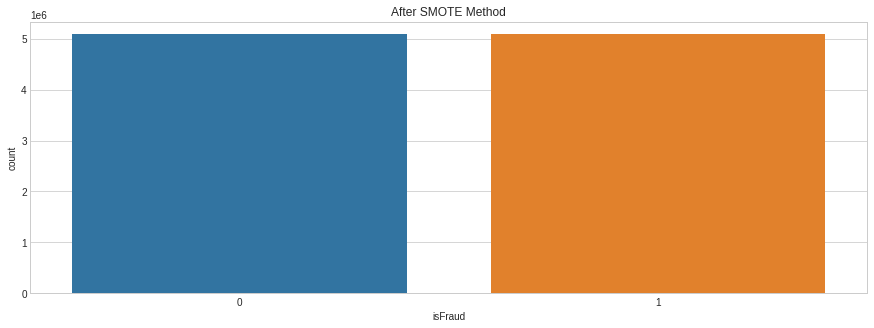

In [22]:
# For visualization purposes
# non-Scaled data

xsmote = pd.DataFrame(data = X_train_smote, columns = X.columns)
ysmote = pd.DataFrame(data = y_train_smote, columns = ['isFraud'])
df_smote = xsmote.join(ysmote)

plt.figure(figsize = (15,5))
sns.countplot(df_smote['isFraud'])
plt.title("After SMOTE Method")

plt.show()
plt.style.use('seaborn-whitegrid')

In [23]:
df_smote.stb.freq(['isFraud'], cum_cols=False)

,isFraud,count,percent
0,1,5083526,50.0
1,0,5083526,50.0


## Scaling for Non-Tree Algorithm

In [24]:
# For non-Tree Algorithms
# Scaled X dataset

X_train_smotesc = scaler.fit_transform(X_train_smote)
X_test_sc = scaler.transform(X_test)

# 7) Machine Learning Modelling

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [26]:
print(f"X_train: {X_train.shape}")
print(f"X_train smote: {X_train_smote.shape}")
print(f"X_train smote scaled: {X_train_smotesc.shape}")
print('\n')

print(f"y_train: {y_train.shape}")
print(f"y_train smote: {y_train_smote.shape}")
print('\n')

print(f"X_test: {X_test.shape}")
print(f"X_test scaled: {X_test_sc.shape}")
print('\n')

print(f"y_test: {y_test.shape}")

X_train: (5090096, 11)
X_train smote: (10167052, 11)
X_train smote scaled: (10167052, 11)


y_train: (5090096,)
y_train smote: (10167052,)


X_test: (1272524, 11)
X_test scaled: (1272524, 11)


y_test: (1272524,)


## Logistic Regression

In [27]:
lr = LogisticRegression()

In [28]:
lr.fit(X_train_smotesc, y_train_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
pred_lr = lr.predict(X_test_sc)

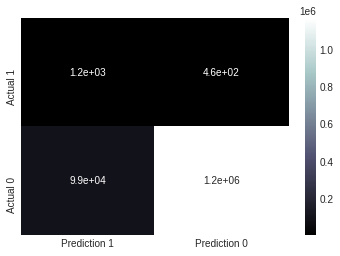

In [31]:
lr_cm = confusion_matrix(y_test, pred_lr, labels = [1,0])
lr_cm_df = pd.DataFrame(data = lr_cm,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

sns.heatmap(lr_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [32]:
lr_cm_df

# FN = The actual is Fraud, but predicted as not fraud
# FP = The actual is not fraud, tapi predicted as fraud

# so we should focus to reducing FN rather than FP
# we get Recall on our evaluation metrics later

,Prediction 1,Prediction 0
Actual 1,1182,461
Actual 0,98623,1172258


In [33]:
tp_lr = lr_cm_df['Prediction 1'][0]
tn_lr = lr_cm_df['Prediction 0'][1]
fp_lr = lr_cm_df['Prediction 1'][1]
fn_lr = lr_cm_df['Prediction 0'][0]

In [34]:
print(classification_report(y_test, pred_lr))


              precision    recall  f1-score   support

           0       1.00      0.92      0.96   1270881
           1       0.01      0.72      0.02      1643

    accuracy                           0.92   1272524
   macro avg       0.51      0.82      0.49   1272524
weighted avg       1.00      0.92      0.96   1272524



In [35]:
rec_lr = recall_score(y_test, pred_lr)

In [36]:
lr_coef = dict(zip(X.columns, abs(lr.coef_[0])))
pd.DataFrame.from_dict(data = lr_coef, orient = 'index', columns=['Coef']).sort_values(by = 'Coef', ascending = False)



,Coef
newbalanceOrig,1.576849e-07
amount,1.067795e-11
oldbalanceOrg,7.598420e-12
oldbalanceDest,3.948170e-12
step,2.186835e-12
type_TRANSFER,1.652484e-12
type_PAYMENT,1.303285e-12
recipient_M,1.303285e-12
type_CASH_OUT,5.726108e-13
newbalanceDest,2.935256e-13


## Random Forest

In [37]:
rf = RandomForestClassifier()

In [48]:
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
pred_rf = rf.predict(X_test)

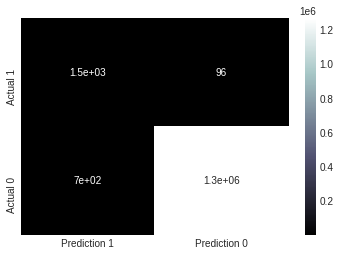

In [52]:
rf_cm = confusion_matrix(y_test, pred_rf, labels = [1,0])
rf_cm_df = pd.DataFrame(data = rf_cm,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

sns.heatmap(rf_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [53]:
rf_cm_df


,Prediction 1,Prediction 0
Actual 1,1547,96
Actual 0,696,1270185


In [54]:
tp_rf = rf_cm_df['Prediction 1'][0]
tn_rf = rf_cm_df['Prediction 0'][1]
fp_rf = rf_cm_df['Prediction 1'][1]
fn_rf = rf_cm_df['Prediction 0'][0]

In [55]:
print(classification_report(y_test, pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.69      0.94      0.80      1643

    accuracy                           1.00   1272524
   macro avg       0.84      0.97      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524



In [56]:
rec_rf = recall_score(y_test, pred_rf)

## XGradient Boosting

In [57]:
xg = GradientBoostingClassifier()

In [58]:
xg.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [59]:
pred_xg = xg.predict(X_test)

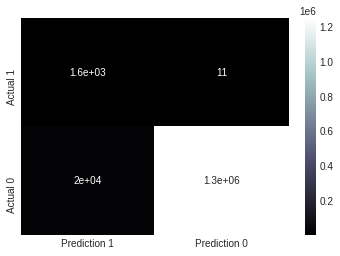

In [61]:
xg_cm = confusion_matrix(y_test, pred_xg, labels = [1,0])
xg_cm_df = pd.DataFrame(data = xg_cm,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

sns.heatmap(xg_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [62]:
xg_cm_df


,Prediction 1,Prediction 0
Actual 1,1632,11
Actual 0,19607,1251274


In [63]:
tp_xg = xg_cm_df['Prediction 1'][0]
tn_xg = xg_cm_df['Prediction 0'][1]
fp_xg = xg_cm_df['Prediction 1'][1]
fn_xg = xg_cm_df['Prediction 0'][0]

In [64]:
print(classification_report(y_test, pred_xg))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270881
           1       0.08      0.99      0.14      1643

    accuracy                           0.98   1272524
   macro avg       0.54      0.99      0.57   1272524
weighted avg       1.00      0.98      0.99   1272524



In [65]:
rec_xg = recall_score(y_test, pred_xg)

## Tuned Logistic Regression

In [39]:
lr_t = LogisticRegression()

param_lr = {
    "penalty": ['l1', 'l2', 'elasticnet', 'none'], 
    "C"      : np.logspace(-4,4,20),
    "solver" : ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
}

grid_lr = RandomizedSearchCV(
    estimator = lr_t,
    param_distributions = param_lr,
    cv = 4,
    scoring = 'recall',
    refit = True,
    n_jobs = -1,
    verbose = 3
)

In [40]:
grid_lr.fit(X_train_smotesc, y_train_smote)


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 48.3min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 67.9min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': ar...
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                 

In [41]:
grid_lr.best_estimator_


LogisticRegression(C=545.5594781168514, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
grid_lr.best_params_

{'C': 545.5594781168514, 'penalty': 'l2', 'solver': 'newton-cg'}

In [43]:
pred_lrt = grid_lr.predict(X_test_sc)

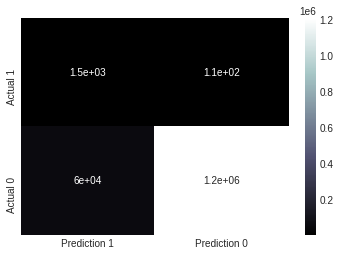

In [44]:
lrt_cm = confusion_matrix(y_test, pred_lrt, labels = [1,0])
lrt_cm_df = pd.DataFrame(data = lrt_cm,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

sns.heatmap(lrt_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [45]:
lrt_cm_df



,Prediction 1,Prediction 0
Actual 1,1532,111
Actual 0,60193,1210688


In [74]:
tp_lrt = lrt_cm_df['Prediction 1'][0]
tn_lrt = lrt_cm_df['Prediction 0'][1]
fp_lrt = lrt_cm_df['Prediction 1'][1]
fn_lrt = lrt_cm_df['Prediction 0'][0]

In [46]:
print(classification_report(y_test, pred_lrt))



              precision    recall  f1-score   support

           0       1.00      0.95      0.98   1270881
           1       0.02      0.93      0.05      1643

    accuracy                           0.95   1272524
   macro avg       0.51      0.94      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524



In [47]:
rec_lrt = recall_score(y_test, pred_lrt)

# 8) Models Summary

In [72]:
summary_rec = pd.DataFrame({
    "Logistic Regression" : [rec_lr],
    "Random Forest" : [rec_rf],
    "XGBoost" : [rec_xg],
    "Tuned Logistic Regression" : [rec_lrt],
}, 
index = ["Recall"])

summary_rec.T

,Recall
Logistic Regression,0.719416
Random Forest,0.941570
XGBoost,0.993305
Tuned Logistic Regression,0.932441


In [76]:
summary_cm = pd.DataFrame({
    "TruePositive" : [tp_lr, tp_rf, tp_xg, tp_lrt],
    "TrueNegative" : [tn_lr, tn_rf, tn_xg, tn_lrt],
    "FalsePositive": [fp_lr, fp_rf, fp_xg, fp_lrt],
    "FalseNegative": [fn_lr, fn_rf, fn_xg, fn_lrt]
}, 
index = summary_rec.columns)

summary_cm

,TruePositive,TrueNegative,FalsePositive,FalseNegative
Logistic Regression,1182,1172258,98623,461
Random Forest,1547,1270185,696,96
XGBoost,1632,1251274,19607,11
Tuned Logistic Regression,1532,1210688,60193,111


# 9) Conclusions
1. The Fraudulent in this dataset is obviously not balance 99% : 1%, but at least we know that most transactions are safe. However maybe it's only 1% transactions which fraud, but when it comes to 'amount', there are \$1,467,967 are fraud (89.2%) and \$178,197.0 are not fraud (10.8%).

2. 16 transactions flagged as fraudulent, but actually there are 8213 transactions are fraud. We definitely can't use `isFlaggedFraud` feature because there are 8197 fraud transaction which are not flagged as fraudulent transaction. 

3. We see all transactions which has been flagged (\$4,861,598) is a lot bigger than the actual (\$1,467,967), eventhough the transaction is way smaller (16 transactions) than the actual fraud (8213 transactions).
This `isFlaggedFraud` feature is so irrelevant for us to see which transaction is fraud.

4. We now know that 100% fraud transaction came from customer recipient, while the transaction which not fraud is from 66.1% Customer and 33.9% Merchant.

5. Most of the number of general transaction is used for cash out and payment:
  - 35.2% of transactions is used for cash out
  - 33.8% of transactions is used for payment
  - 22.0% of transactions is used for cash in
  -  8.4% of transaction is used for transfer
  -  6.5% of transaction is used for debit

6. All fraud transactions is coming from 'transfer' and 'cash out' transaction type.

7. Fraudulent transaction is using different origin name and different destination name.

8. The patterns of fraudulent transactions are either:
  - 1 origin name for 1 destination name, or
  - 1 origin name for 2 destination name.

  But fraudulent transaction tends to using 1 origin name with 1 different destination name. 99.5% fraudulent transaction came from 1 different destination name and 0.5% using 2 same destination name with using 1 origin name.

9. Fraudulent transaction tends to emptying the origin's balance, especially origin's balance which lower than equal \$10,000,000. 

10. The fraudulent behavior of the agents aims to profit by taking control customers accounts and try to empty the funds by transferring to another account and then cashing out of the system. The difference pattern of fraud and not fraud transaction is very contrast.

11. No matter what, if there's a deviation between origin and destination's balance, that transaction will be called as fraud.

12. Our Machine Learning model using Xtreme Gradient Boosting algorithm can predict fraud transaction with Recall metrics: 0.99 of 1.0 because in this case we are going to reduce the False Negative (the actual is fraud, but model predicts not fraud).


# 10) Recommendations
1. Don't use `isFlaggedFraud` again.
2. Otherwise, use our Machine Learning model with the best Recall metrics is 0.99 of 1.00. Our model can predict whether the transaction is fraud or not with minimum error.